<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
0
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Popu

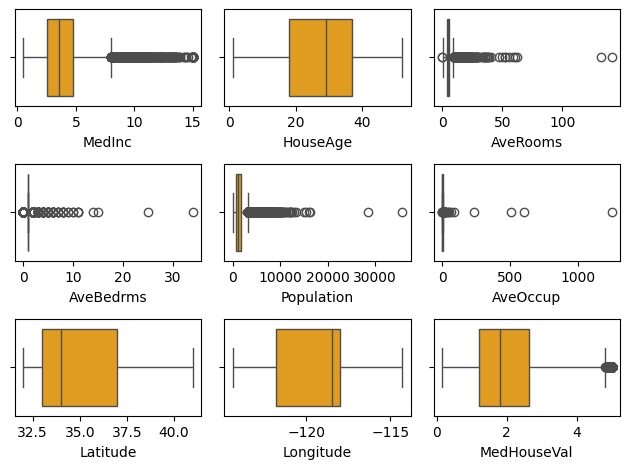

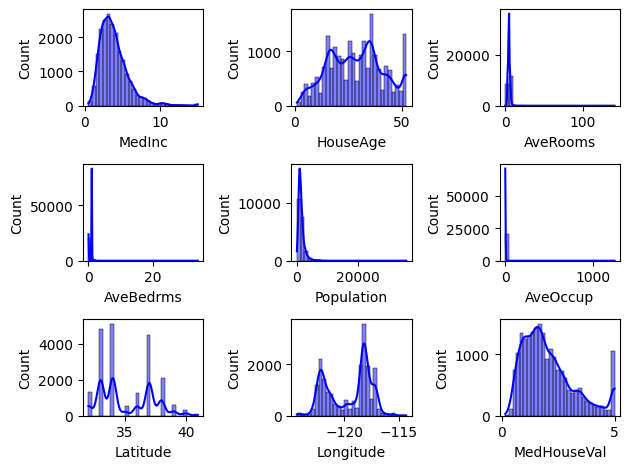

<Figure size 640x480 with 0 Axes>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_california_housing

df = fetch_california_housing(as_frame=True).frame
df.head()
df.info()
df.nunique()

print(df.isnull().sum())
print(df.duplicated().sum())
print(df.columns)
print(df.isnull().sum())

df['AveBedrms'].fillna(df['AveBedrms'].median(), inplace=True)

for col in df.iloc[:, 2:7]:
    df[col] = df[col].astype(int)

df.head()
print(df.describe().T)

num_cols = df.select_dtypes(include=[np.number]).columns

for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col], color='orange')
plt.tight_layout(); plt.show()

for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, color='blue', bins=30)
plt.tight_layout(); plt.show()


plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()


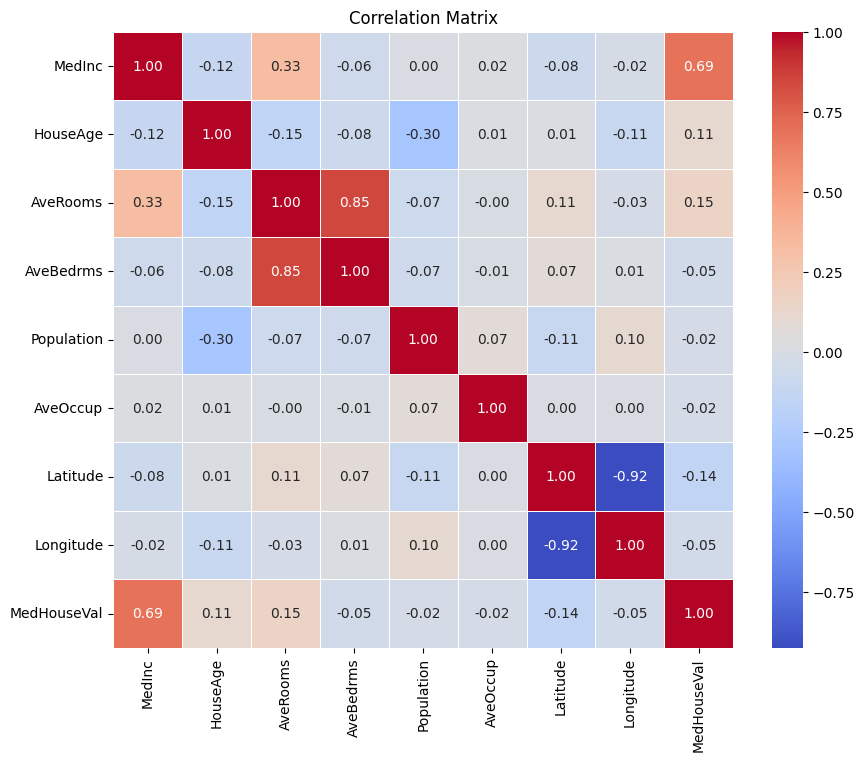

<Figure size 600x600 with 0 Axes>

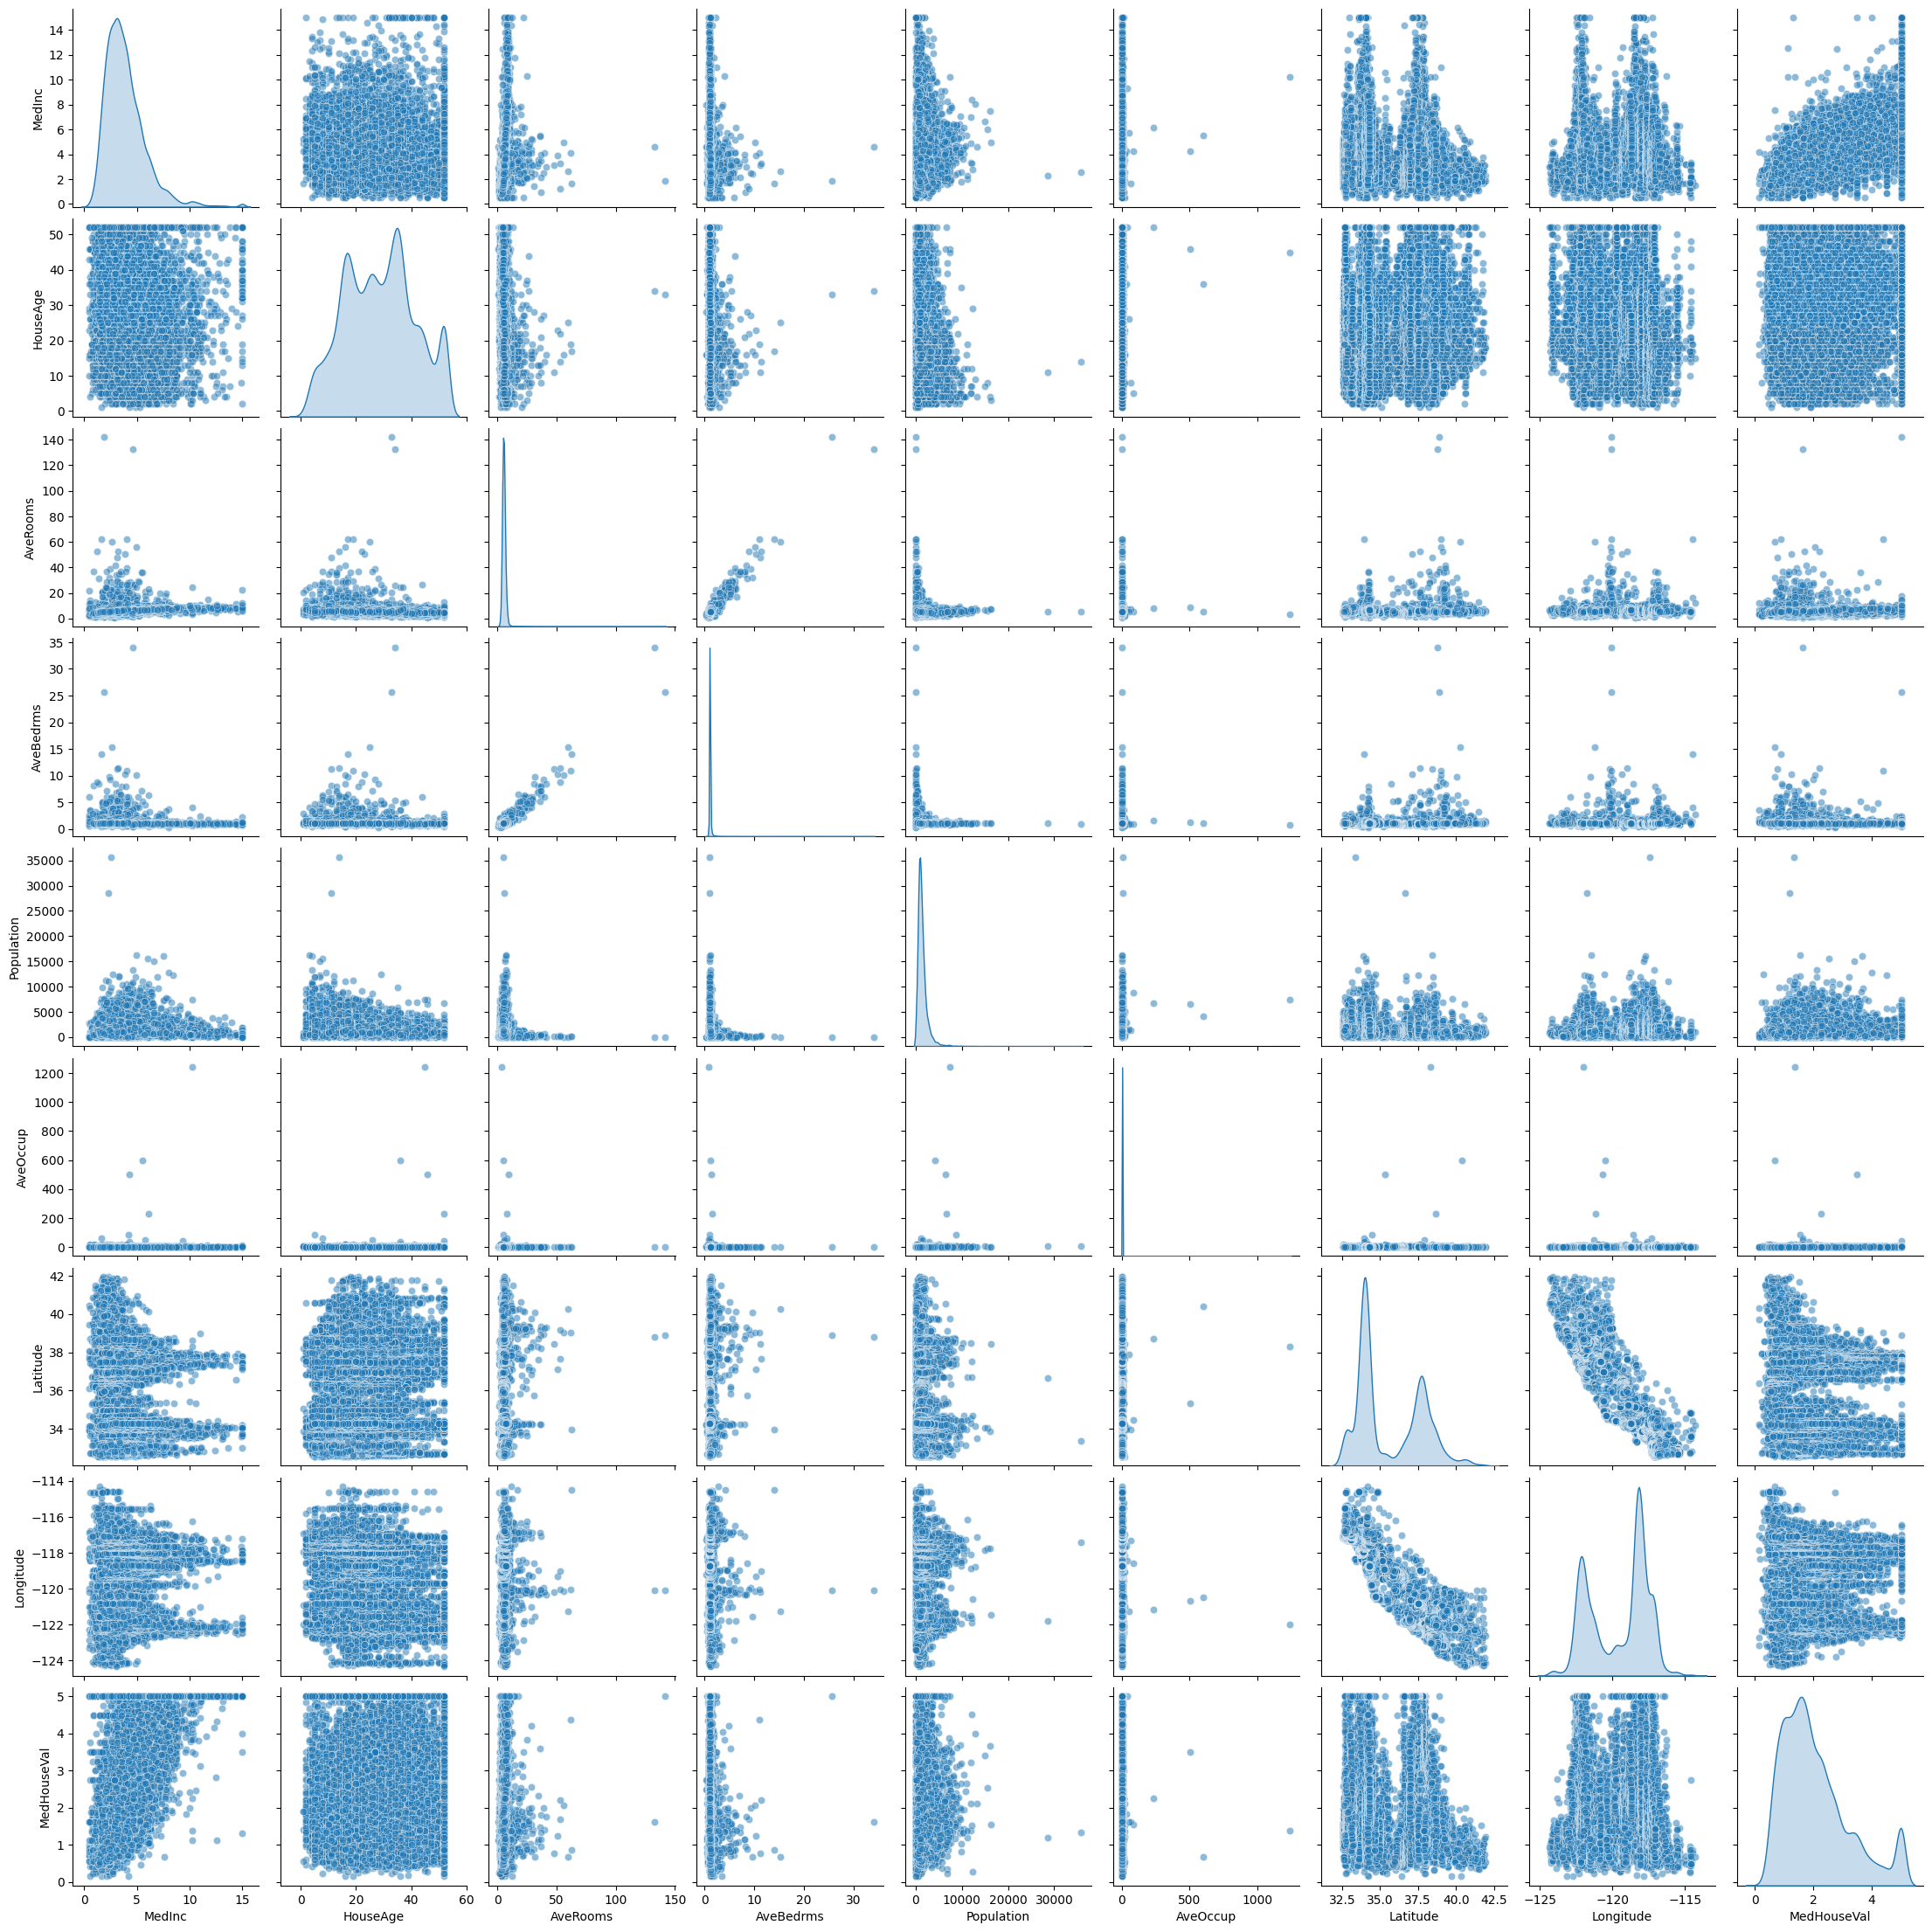

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

df = fetch_california_housing(as_frame=True).frame

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Pairplot
plt.figure(figsize=(6, 6))
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
         PCA1      PCA2  label
0   -2.684126  0.319397      0
1   -2.714142 -0.177001      0
2   -2.888991 -0.144949      0
3   -2.745343 -0.318299      0
4   -2.728717  0.326755      0
..        ...       ...    ...
145  1.944110  0.187532      2
146  1.527167 -0.375317      2
147  1.764346  0.078859      2
148  1.900942  0.116628      2
149  1.390189 -0.282661      2

[150 rows x 3 columns]


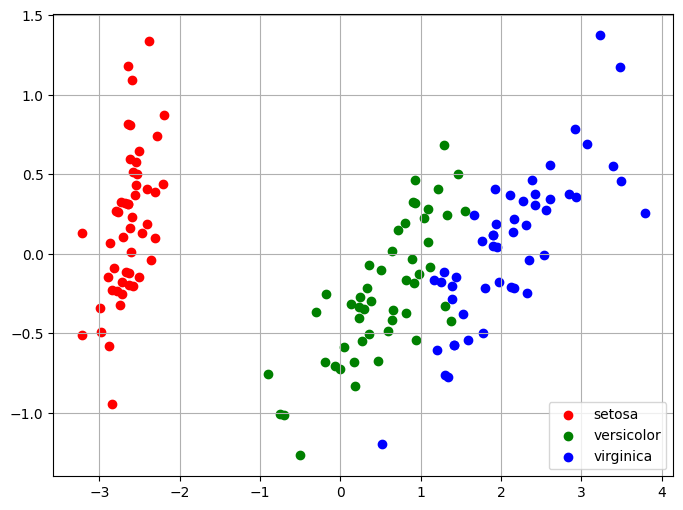

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
data = iris.data
labels = iris.target
label_names = iris.target_names

df = pd.DataFrame(data, columns=iris.feature_names)
print(df.head())
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data)

reduced_df = pd.DataFrame(data_reduced, columns=['PCA1', 'PCA2'])
reduced_df['label'] = labels
print(reduced_df)

plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for i, label in enumerate(np.unique(labels)):
    plt.scatter(reduced_df[reduced_df['label'] == label]['PCA1'],
                reduced_df[reduced_df['label'] == label]['PCA2'],
                label=label_names[label],
                color=colors[i])
plt.legend()
plt.grid()
plt.show()


In [30]:
import pandas as pd

data = pd.read_csv(r"/content/a.csv")
print(data)

def find_s_algorithm(data):
    attributes = data.iloc[:, :-1].values
    target = data.iloc[:, -1].values

    for i in range(len(target)):
        if target[i] == "Yes":
            hypothesis = attributes[i].copy()
            break

    for i in range(len(target)):
        if target[i] == "Yes":
            for j in range(len(hypothesis)):
                if hypothesis[j] != attributes[i][j]:
                    hypothesis[j] = '?'
        print(i, hypothesis)

    return hypothesis

final_hypothesis = find_s_algorithm(data)
print("Most Specific Hypothesis:", final_hypothesis)


     Sky AirTemp Humidity    Wind Water Forecast EnjoySport
0  Sunny    Warm   Normal  Strong  Warm     Same        Yes
1  Sunny    Warm     High  Strong  Warm     Same        Yes
2  Rainy    Cold     High  Strong  Warm   Change         No
3  Sunny    Warm     High  Strong  Cool   Change        Yes
0 ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
1 ['Sunny' 'Warm' '?' 'Strong' 'Warm' 'Same']
2 ['Sunny' 'Warm' '?' 'Strong' 'Warm' 'Same']
3 ['Sunny' 'Warm' '?' 'Strong' '?' '?']
Most Specific Hypothesis: ['Sunny' 'Warm' '?' 'Strong' '?' '?']


MSE: 0.555891598695244
R2 Score: 0.5757877060324511


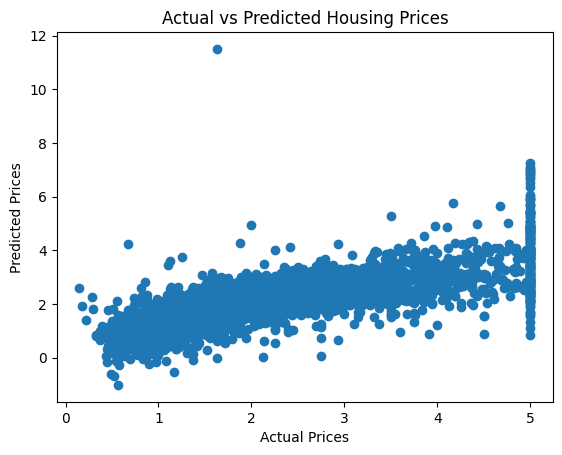

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
df = data.frame

X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices")
plt.show()


Accuracy: 94.73684210526315
Prediction for new sample: benign


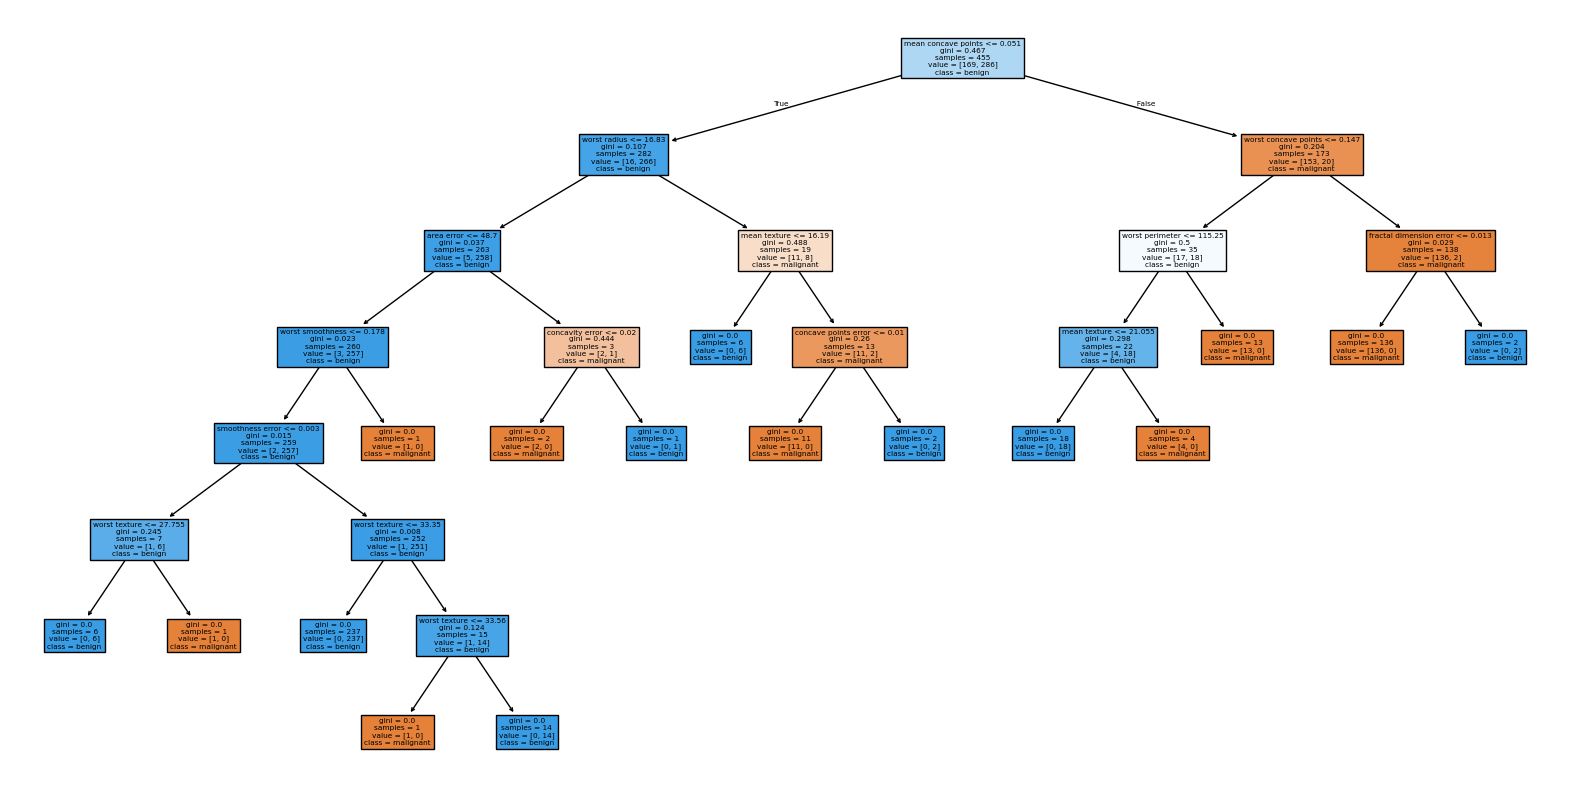

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

df = load_breast_cancer()
x = df.data
y = df.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

prediction = model.predict(x_test)

accuracy = accuracy_score(y_test, prediction)
print("Accuracy:", accuracy * 100)

new_sample = x_test[0].reshape(1, -1)
prediction = model.predict(new_sample)
prediction_class = 'benign' if prediction[0] == 1 else 'malignant'
print("Prediction for new sample:", prediction_class)

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=df.feature_names.tolist(), class_names=df.target_names.tolist())
plt.show()


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Accuracy: 80.83%

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       0.33      0.67      0.44         3
           3       1.00      0.00      0.00         5
           4       1.00      0.50      0.67         4
           5       1.00      1.00      1.00         2
           7       1.00      0.75      0.86         4
           8       1.00      0.67      0.80         3
           9       1.00      0.75      0.86         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       0.40      1.00      0.57         4
          13       1.00      0.80      0.89         5
          14       1.00      0.40      0.57         5
          15       0.67      1.00      0.

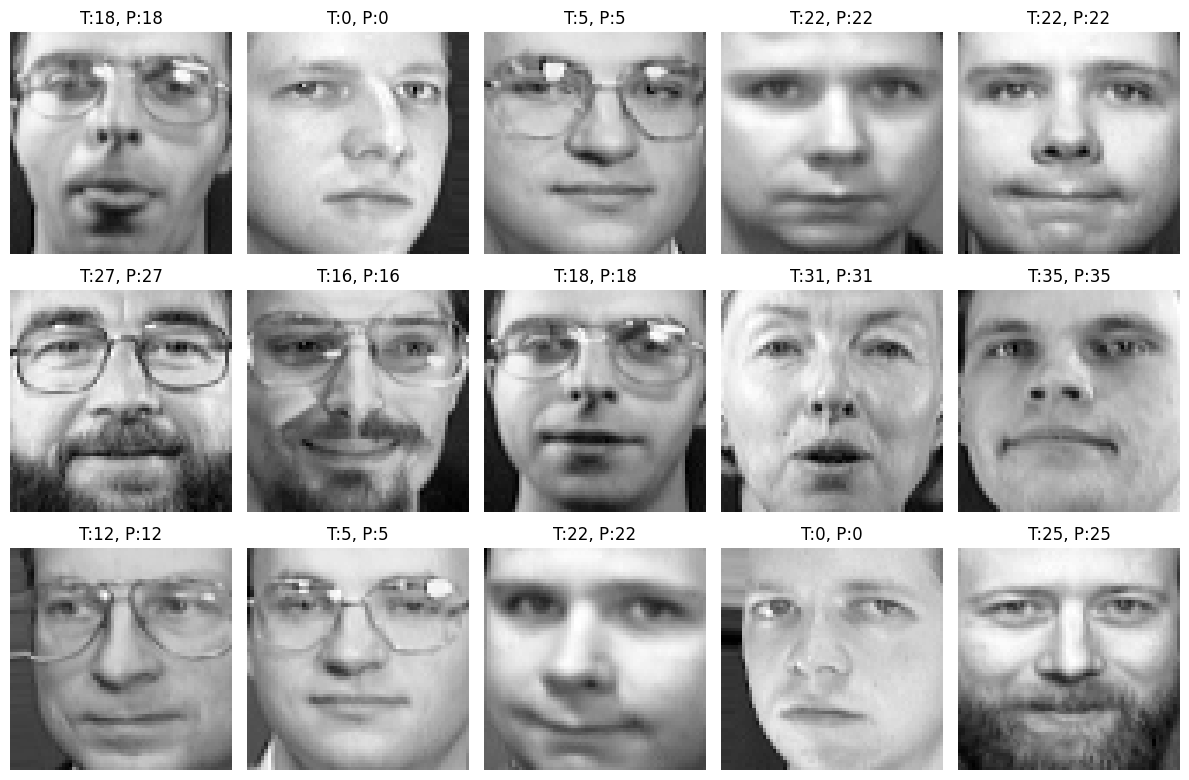

In [33]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

data = fetch_olivetti_faces(shuffle=True, random_state=42)
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

cv_score = cross_val_score(gnb, X, y, cv=5, scoring='accuracy')
print(f'\nCross-validation accuracy: {cv_score.mean() * 100:.2f}%')

fig, axes = plt.subplots(3, 5, figsize=(12, 8))
for ax, image, label, pred in zip(axes.ravel(), X_test, y_test, y_pred):
    ax.imshow(image.reshape(64, 64), cmap=plt.cm.gray)
    ax.set_title(f"T:{label}, P:{pred}")
    ax.axis('off')
plt.tight_layout()
plt.show()


[[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 ...
 [ 1.25617928 -1.90229671]
 [10.37479406  1.67201011]
 [-5.4752433  -0.67063679]]
          PCA1       PCA2  labels
0     9.192837   1.948583       1
1     2.387802  -3.768172       1
2     5.733896  -1.075174       1
3     7.122953  10.275589       1
4     3.935302  -1.948072       1
..         ...        ...     ...
564   6.439315  -3.576817       1
565   3.793382  -3.584048       1
566   1.256179  -1.902297       1
567  10.374794   1.672010       1
568  -5.475243  -0.670637       0

[569 rows x 3 columns]


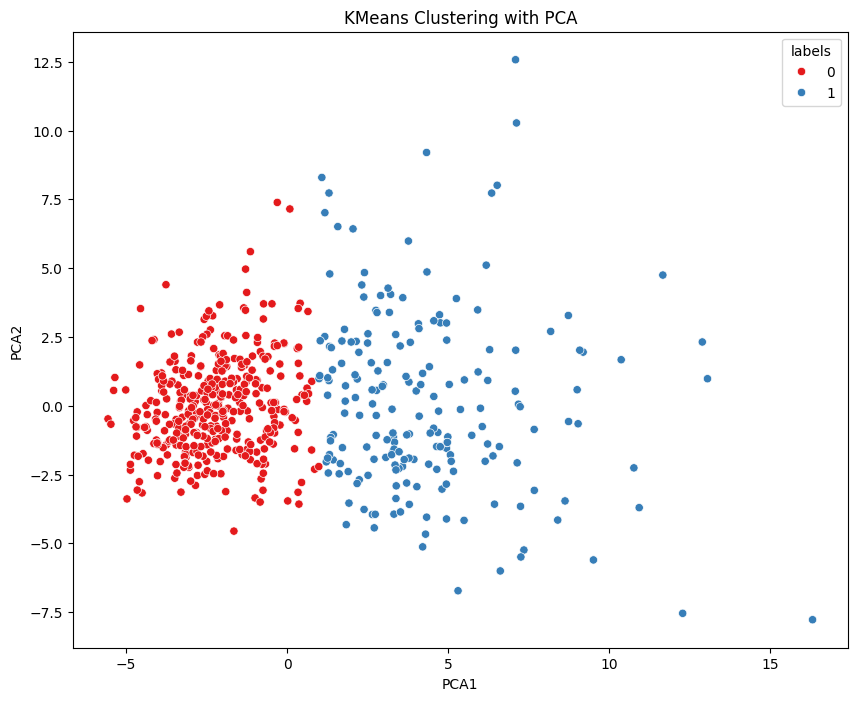

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = load_breast_cancer()
x = data.data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(x_scaled)
labels = kmeans.labels_

pca = PCA(n_components=2)
df_pca = pca.fit_transform(x_scaled)
print(df_pca)
df_visual = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_visual['labels'] = labels
print(df_visual)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='labels', palette='Set1', data=df_visual)
plt.title('KMeans Clustering with PCA')
plt.show()
